## INTRODUCTION TO DISTRIBUTION FUNCTIONS

#### The Concepts

Random variable

Normality of residuals

Confidence intervals

Mean, median, mode, standard deviation, variance.

Law of large numbers

##### Types of Distribution Functions

* Normal

* Uniform

* Binomial

* Poisson

#### Extras for anyone who has more time and interest

Central limit theorem

6 sigma standar example (industry quality check)

The moments of the normal distribution (mean, variance, skewness, kurtosis)

PDF, PMF, CMF



In [1]:
import numpy as np
import scipy
from scipy import stats 
from scipy.stats import norm, skew, kurtosis
from matplotlib import pyplot as plt
import seaborn as sns
import math

### SOME BASICS

In [2]:
x = np.arange(4)
x = np.append(x,[3,1,1,12])
print(x)
print('mean_x=', np.mean(x),'\n', \
      'median_x=', np.median(x),'\n', \
      'mode_x=',  stats.mode(x),'\n', \
      'range_x =', max(x)-min(x))

[ 0  1  2  3  3  1  1 12]
mean_x= 2.875 
 median_x= 1.5 
 mode_x= ModeResult(mode=array([1]), count=array([3])) 
 range_x = 12


Most distribution functions are described by their mean and range. But if there are outliers median is a better measure of your average.

**Random Variable:** 

A variable whose values are selected through a random phenomenon. The underlying phenomenon usually can be described by a typical distribution function.

**iid:** 

Independent and identically distributed random variables have the same probability distribution function but are independent from each other.


**Probability distribution:** 

A function giving the probability of different outcomes in an experiment. There are typical probability distributions that occur often and describe the real world. 

### NORMAL (GAUSSIAN) DISTRIBUTION

A lot of things in the real world come from an underlying normal distribution.

Example: You are measuring the mean height of a population. The more measurement you have, the more your measurements are likely to follow the Gaussian curve, around the mean of your population height.

In [3]:
nor_mean = 10
nor_std = 3

np.random.seed(100554)
var_normal = np.random.normal(nor_mean, nor_std, 1000)


/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

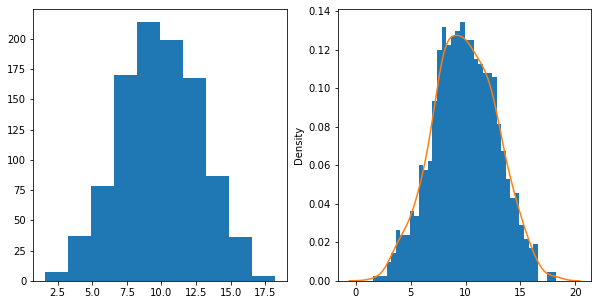

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(var_normal)

plt.subplot(122)
plt.hist(var_normal,density =True,bins =40)
sns.distplot(var_normal, hist = False, kde = True)


**UNIFORM**

/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


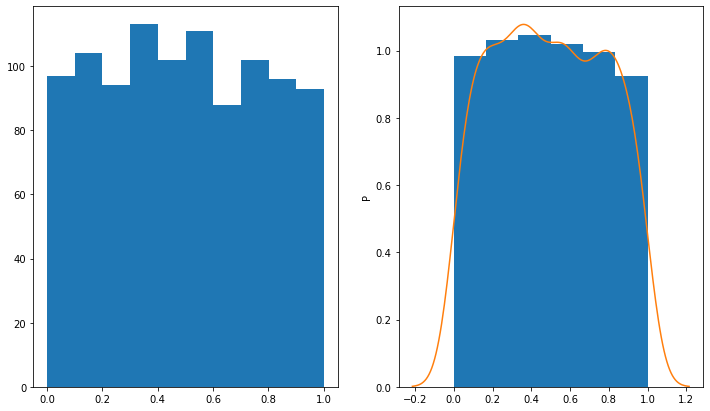

In [5]:
var_uniform = np.random.random(1000)

plt.figure(figsize=(12,7))

plt.subplot(121)
plt.hist(var_uniform)

plt.subplot(122)
plt.hist(var_uniform,density =True,bins = 6)


### Let's check later the pdf from sns.distplot
sns.distplot(var_uniform, hist = False, kde = True)
plt.ylabel('P');



*Reference for when you get confused and have time:* https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok

Essentially, y values are ok to be larger than 1, as long as we talk about the probability density. They need to however then be squeezed into a tiny base, so that the overall area cannot be larger than 1.

### Exercise

Research on pmf, pdf, cdf.

Probability density function, probability mass function, cumulative distribution function.

In [6]:
vn = np.random.normal(0, 1, 1000)



/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'CDF')

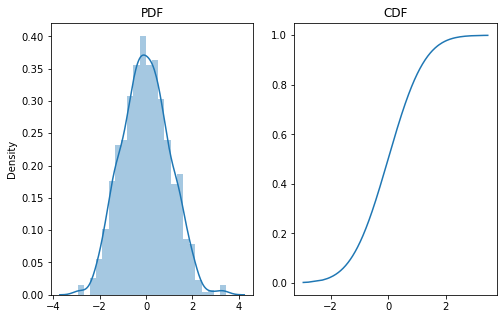

In [7]:
# Plot the pdf
plt.figure(figsize=[8,5])
plt.subplot(1,2,1)
sns.distplot(vn, kde = True)
plt.title('PDF')

# Plot the cdf
plt.subplot(1,2,2)
sns.lineplot(x=vn, y=scipy.stats.norm.cdf(vn))
plt.title('CDF')
#plt.xlim([-5,5])

Cumulative Distribution Function gives the probability that a 
random variable will take up a value up to a certain cut-off.

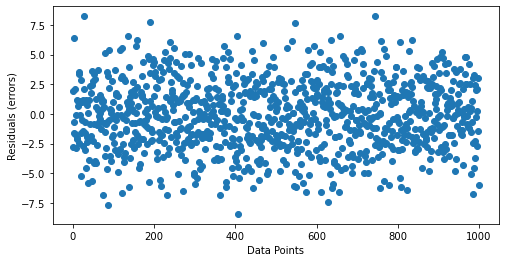

In [8]:
plt.figure(figsize=[8,4])
x = np.arange(len(var_normal))
plt.scatter(x,var_normal-10)
plt.xlabel('Data Points')
plt.ylabel('Residuals (errors)');

#### LET'S MODIFY THE VARIANCE

In [9]:
nor_std2 = 2
nor_std3 = 5
var_normal2 = np.random.normal(nor_mean, nor_std2, 1000)
var_normal3 = np.random.normal(nor_mean, nor_std3, 1000)

/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

<AxesSubplot:ylabel='Density'>

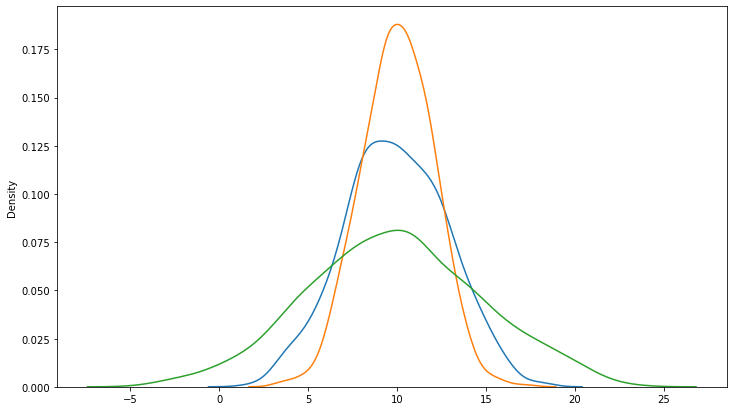

In [10]:
plt.figure(figsize=(12,7))

sns.distplot(var_normal, hist = False, kde = True,label='sd =3')
sns.distplot(var_normal2, hist = False, kde = True, label='sd =2')
sns.distplot(var_normal3, hist = False, kde = True,label='sd =5')

### CONFIDENCE INTERVAL

$$ CI = \bar{x} \pm z \frac{\sigma}{\sqrt{n}}$$


In the above equation the $\sigma$ is the standard deviation, z is the confidence level and n is the sample size.

68.2 - 95 - 99.97 % confidence intervals correspond to 1-2-3 $\sigma$ levels.

For eg. if you report your mean with  3$\sigma$, this is a confidence level of 99.97%, the percentage of times, this will be your sample mean, or the likelihood that the true value of your population parameter is this. 

Think about the error bars. (In economics 2 $\sigma$ errors are common, in astronomy you try 3).

/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


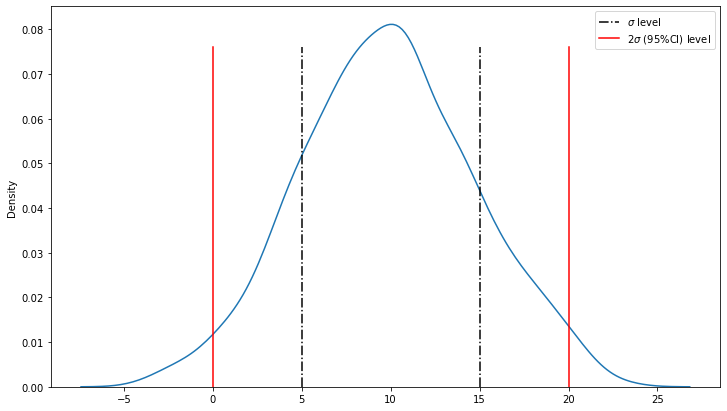

In [11]:
plt.figure(figsize=(12,7))

sns.distplot(var_normal3, hist = False, kde = True)
y = np.arange(100)/1300
x = np.zeros(100) + 10
plt.plot(x + nor_std3 ,y,'-.k',label = '$\sigma$ level')
plt.plot(x - nor_std3 ,y,'-.k')
plt.plot(x + 2* nor_std3 ,y,'r',label = '$2 \sigma$ (95%CI) level')
plt.plot(x - 2 * nor_std3 ,y,'r')
plt.legend()


**Z-score** tells you how many standard deviations you are away from the centre. Check this out in the Auto-regressive model.  

$$(x - \mu)/\sigma$$

**Discussion:** Why do we want normal errors rather than uniform?

## BREAK

------------

--------------

### BERNOUILLI DISTRIBUTION


* Two possible outcomes.

* Coin toss, pass/fail, etc.

Success probability is p, failure probability (1-p).

If it's a fair coin, that means 0.5 probability of being heads and 1-0.5 probability of being tails.

### BINOMIAL DISTRIBUTION

Sum of independent and identically distributed **iid** random variables.

If you had two coin tosses, for three heads your probability would be 

$p^3 = 0.5^3 = 0.125$

A nice long explanation here: 
    https://math.stackexchange.com/questions/838107/what-is-the-difference-and-relationship-between-the-binomial-and-bernoulli-distr
    



Flipping the coin 20 times

In [12]:
n_flip = 1000000
var_binom = np.random.binomial(n_flip, 0.5)
print(f'number of successes: {var_binom}')


number of successes: 499927


**LAW OF LARGE NUMBERS**

With larger number of experiments, the mean result get closer to the expected p. n_trial is like number of coin tosses (so multiple Bernouilli processes adding up as binomial). You can check that by changing the number of flips above.

This is also why, at the beginning of the notebook if you increased the n for the normal distribution (or the uniform) the samples became representative of the underlying distribution.

In [13]:
np.random.seed(49)
n_trial = 10000
n_trial2 = 100

var_binom = np.random.binomial(10, 0.5, n_trial) # check out CLT, below.
var_binom2 = np.random.binomial(10, 0.5, n_trial2) 


print(f'''The probability of successes (heads) in {n_trial2} \
trials is = {var_binom2.mean()}''')


print(f'''The probability of successes (heads) in {n_trial} \
trials is = {var_binom.mean()}''')

var_binom2

The probability of successes (heads) in 100 trials is = 4.89
The probability of successes (heads) in 10000 trials is = 4.9816


array([5, 6, 6, 7, 3, 6, 6, 7, 6, 6, 4, 3, 6, 3, 3, 5, 3, 5, 4, 3, 5, 6,
       5, 5, 5, 6, 6, 5, 7, 4, 8, 5, 7, 7, 3, 6, 7, 3, 3, 3, 5, 4, 2, 6,
       5, 4, 6, 4, 5, 6, 5, 3, 5, 3, 3, 4, 4, 6, 4, 7, 4, 5, 5, 3, 4, 6,
       5, 7, 2, 6, 4, 5, 6, 3, 5, 7, 4, 3, 4, 8, 6, 3, 4, 4, 3, 7, 4, 7,
       5, 6, 5, 4, 7, 6, 5, 3, 3, 4, 5, 8])

In the above, 10 is the number of throws in each trial.

/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


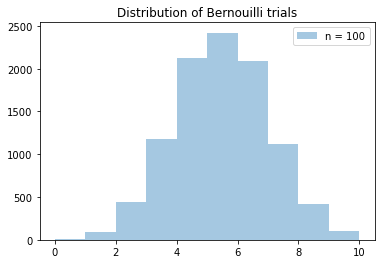

In [14]:
sns.distplot(var_binom, hist = True, kde = False, 
             bins = 10, label = 'n = 100')
plt.title('Distribution of Bernouilli trials')
plt.legend()

### POISSON DISTRIBUTION (in the course material)

The probability is given by *$p = r^x e^{-r}/x!$*

where
----------------------- ------------------------------------

t: time interval

r =  rate (is average number of events happening in a given interval) 

x: value for which you are trying to calculate the probability.
----------------------- ------------------------------------




x=3

$x! = 3*2*1$

**Question:** Let's say 5 people on average come at the reception every hour. What is the probability of 11 people coming in the tomorrow at this hour?

 *$p = r^x e^{-r}/x!$*
 
  *$p = 5^{11} e^{-5}/11!$*



In [15]:
p = 5 ** 11 * math.exp(-5) / math.factorial(11)
p

0.00824217668537358

-------------

## Appendix I

#### CENTRAL LIMIT THEOREM

In the example above, we saw that as the number of trials increased in a Binomial trial, we got closer to the expected value (mean of 0.5). 

Now let's go to the next step: Creating many Binomial distributions each of which have several succes/failures.

We do the above experiment 10000 times with n_trials in each set.


So in the first bin between 0 and 0.1, there are 50 people.

Nice little infographic on this page:

http://rex-analytics.com/the-law-of-large-numbers-its-not-the-central-limit-theorem/

In [16]:
n_cl = 10000
ran_var_binom = np.random.binomial(n_trial,0.5,n_cl)


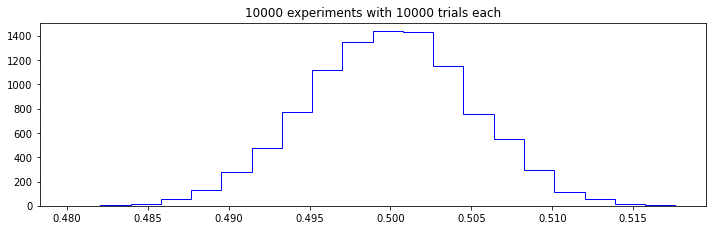

In [17]:
plt.figure(figsize=(10,6))

plt.subplot(212)
plt.hist(ran_var_binom/10000,color='b', bins=20, histtype= 'step' )
plt.title(f'{n_cl} experiments with {n_trial} trials each')
plt.tight_layout()


It looks like we simulated binomial trials but we ended up with a normal distribution of their means again.

## Appendix II

### $6\sigma$ Problem: 

  - Defect: 1 minute of power cut.

  - 300 defects occured last year. 
  
  - Is this within $6\sigma$ standards.


Ok, the limit for 6 $\sigma$ is 99.99966 (3.4 defects per million), so we want better. 

In [18]:
def_per_year = 300
Opportunities = 60*24*365
print(f'{Opportunities} = number of minutes per year')

525600 = number of minutes per year


In [19]:
def_per_million = 300 * 1000000 / 525600
def_per_million

570.7762557077625

300 defects in 525600 would be on the order of 571 defects per million. The process need to be improved.

In [20]:
worked_percent = (Opportunities - def_per_year )/Opportunities * 100
print(f'Although it worked more than {worked_percent} this doesnt match the 6-sigma industry standard.')

Although it worked more than 99.94292237442922 this doesnt match the 6-sigma industry standard.


## Appendix III
### Building The Probability Density Function (PDF) From Scratch

/Users/dina.deifallah/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


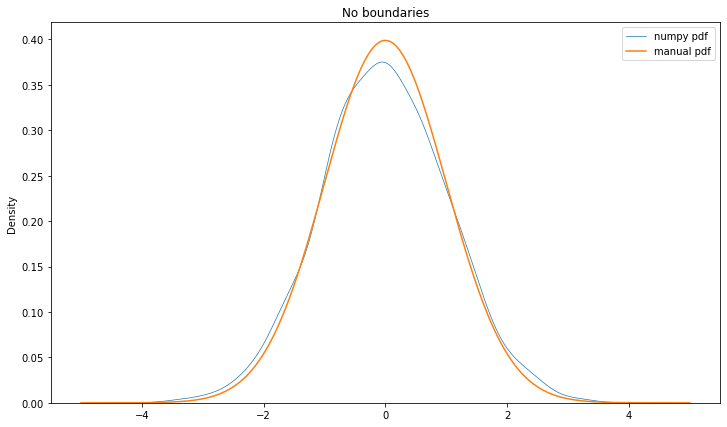

In [21]:

x_n = np.linspace(-5,5,50000)
sd= 1
mn=0

# PDF of the Gaussian gives the probabilities on the
# y axis for the x values.
def pdf_normal(x,sd,mn):
    """Function that creates a vector with
    the probabilities for a normal distribution.
    x is the random variable, sd is standard 
    deviation and mn is mean."""
    
    x=x
    y = 1/(sd * math.sqrt(2*math.pi))*np.exp(-(x-mn)**2/(2*sd**2))
    return y
    
seed = 1005
y_np = np.random.normal(mn,sd,1000)
y = pdf_normal(x_n,sd,mn)

# PLOTTING 
plt.figure(figsize=[12,7])
sns.distplot(y_np, hist = False, kde = True, \
             kde_kws=dict(linewidth=0.7), label = 'numpy pdf',)
plt.plot(x_n,y,'-',label = 'manual pdf')
plt.title('No boundaries')
plt.legend()


## Appendix IV

### SOME MORE DEFINITIONS


**Skewness:** Asymmmetry of a distribution function about the mean.

Negatively skewed: Tail is on the left.


$$ E[(\frac{Y - m}{\sigma})^3] $$

**Kurtosis**: How heavily a distribution function's tails differ from the tails of a normal df. Higher kurtosis means heavier tails and hence larger impact of outliers.

**Mean, variance, skewness and the kurtosis are the four moments of the df (powers)**.

https://brownmath.com/stat/shape.htm